이 노트북은 [케라스 창시자에게 배우는 딥러닝 2판](https://tensorflow.blog/kerasdl2/)의 예제 코드를 담고 있습니다.

<table align="left">
    <tr>
        <td>
            <a href="https://colab.research.google.com/github/rickiepark/deep-learning-with-python-2nd/blob/main/chapter05_fundamentals-of-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
        </td>
    </tr>
</table>

In [ ]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

# 머신 러닝의 기본 요소

## 일반화: 머신 러닝의 목표

### 과소적합과 과대적합

#### 잡음 섞인 훈련 데이터

#### 불확실한 특성

#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 6ms/step - loss: 0.6117 - accuracy: 0.8124 - val_loss: 0.2665 - val_accuracy: 0.9211
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.9210 - val_loss: 0.1876 - val_accuracy: 0.9436
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1676 - accuracy: 0.9479 - val_loss: 0.1809 - val_accuracy: 0.9470
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1187 - accuracy: 0.9635 - val_loss: 0.1838 - val_accuracy: 0.9469
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0880 - accuracy: 0.9724 - val_loss: 0.1128 - val_accuracy: 0.9674
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0648 - accuracy: 0.9791 - val_loss: 0.1297 - val_accuracy: 0.9614
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9844 - val_loss: 0.1181 - val_accuracy: 0.9682
Epoch 

**검증 정확도 비교 그래프 그리기**

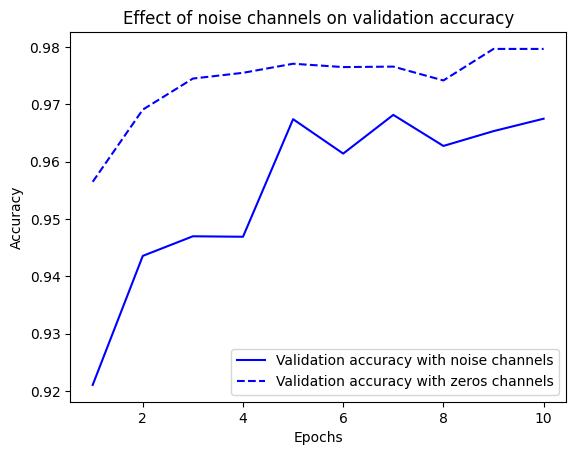

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2972 - accuracy: 0.9153 - val_loss: 0.1709 - val_accuracy: 0.9508
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1232 - accuracy: 0.9646 - val_loss: 0.1048 - val_accuracy: 0.9698
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9766 - val_loss: 0.0977 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9830 - val_loss: 0.0817 - val_accuracy: 0.9754
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0438 - accuracy: 0.9872 - val_loss: 0.0914 - val_accuracy: 0.9723
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0827 - val_accuracy: 0.9753
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0249 - accuracy: 0.9929 - val_loss: 0.0762 - val_accuracy: 0.9797
Epoch 

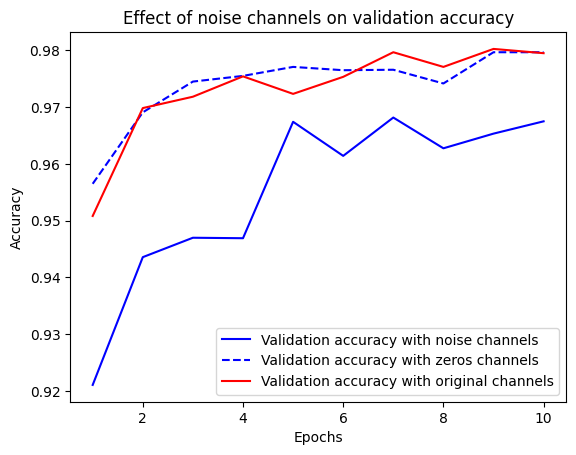

In [9]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r-",
         label="Validation accuracy with original channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 2.3153 - accuracy: 0.1045 - val_loss: 2.3049 - val_accuracy: 0.1071
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2989 - accuracy: 0.1157 - val_loss: 2.3139 - val_accuracy: 0.0985
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2895 - accuracy: 0.1279 - val_loss: 2.3186 - val_accuracy: 0.1070
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2777 - accuracy: 0.1384 - val_loss: 2.3261 - val_accuracy: 0.1029
Epoch 5/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2608 - accuracy: 0.1517 - val_loss: 2.3333 - val_accuracy: 0.1048
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2407 - accuracy: 0.1672 - val_loss: 2.3455 - val_accuracy: 0.1018
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2169 - accuracy: 0.1820 - val_loss: 2.3653 - val_accuracy: 0.0977

#### 매니폴드 가설

#### 일반화의 원천인 보간

#### 딥러닝이 작동하는 이유

#### 가장 중요한 훈련 데이터

## 머신 러닝 모델 평가

### 훈련, 검증, 테스트 세트

#### 단순 홀드아웃 검증

#### K-겹 교차 검증

#### 셔플링을 사용한 반복 K-겹 교차 검증

### 상식 수준의 기준점을 넘기

### 모델 평가에 대해 유념해야 할 점

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 425.2138 - accuracy: 0.3077 - val_loss: 2.2497 - val_accuracy: 0.1953
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8135 - accuracy: 0.1999 - val_loss: 2.3342 - val_accuracy: 0.1848
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9491 - accuracy: 0.1780 - val_loss: 2.1762 - val_accuracy: 0.1897
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5137 - accuracy: 0.1942 - val_loss: 2.1187 - val_accuracy: 0.2136
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6652 - accuracy: 0.1854 - val_loss: 2.1175 - val_accuracy: 0.2077
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5160 - accuracy: 0.1696 - val_loss: 2.3288 - val_accuracy: 0.1275
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4367 - accuracy: 0.1750 - val_loss: 2.1648 - val_accuracy: 0.1918
Epoc

**같은 모델을 적절한 학습률로 훈련하기**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3477 - accuracy: 0.9103 - val_loss: 0.1343 - val_accuracy: 0.9599
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1234 - accuracy: 0.9643 - val_loss: 0.1563 - val_accuracy: 0.9617
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0965 - accuracy: 0.9743 - val_loss: 0.1491 - val_accuracy: 0.9655
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0830 - accuracy: 0.9783 - val_loss: 0.1369 - val_accuracy: 0.9728
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0681 - accuracy: 0.9827 - val_loss: 0.1591 - val_accuracy: 0.9725
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0621 - accuracy: 0.9853 - val_loss: 0.1786 - val_accuracy: 0.9703
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0536 - accuracy: 0.9867 - val_loss: 0.1916 - val_accuracy: 0.9717
Epoch 

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [13]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6652 - accuracy: 0.8350 - val_loss: 0.3600 - val_accuracy: 0.9044
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3529 - accuracy: 0.9026 - val_loss: 0.3093 - val_accuracy: 0.9146
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.3176 - accuracy: 0.9115 - val_loss: 0.2913 - val_accuracy: 0.9198
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3015 - accuracy: 0.9156 - val_loss: 0.2830 - val_accuracy: 0.9221
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2919 - accuracy: 0.9183 - val_loss: 0.2791 - val_accuracy: 0.9220
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2856 - accuracy: 0.9205 - val_loss: 0.2746 - val_accuracy: 0.9242
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.9214 - val_loss: 0.2716 - val_accuracy: 0.9272
Epoch 

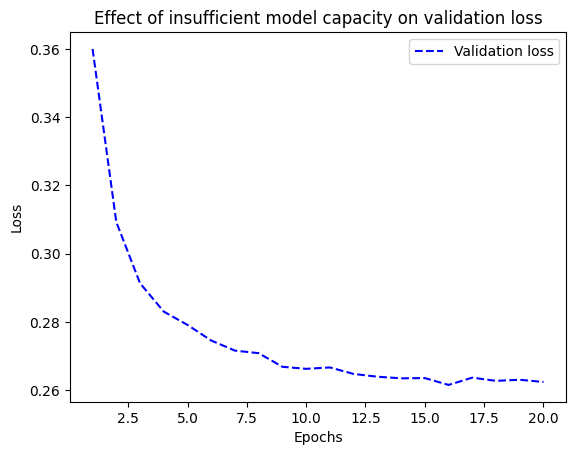

In [14]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3685 - accuracy: 0.8944 - val_loss: 0.1803 - val_accuracy: 0.9483
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1629 - accuracy: 0.9519 - val_loss: 0.1429 - val_accuracy: 0.9564
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1146 - accuracy: 0.9655 - val_loss: 0.1192 - val_accuracy: 0.9657
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0872 - accuracy: 0.9742 - val_loss: 0.0993 - val_accuracy: 0.9718
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0696 - accuracy: 0.9790 - val_loss: 0.0937 - val_accuracy: 0.9716
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0587 - accuracy: 0.9820 - val_loss: 0.0889 - val_accuracy: 0.9741
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0879 - val_accuracy: 0.9747
Epoch 

## 일반화 성능 향상하기

### 데이터셋 큐레이션

### 특성 공학

### 조기 종료 사용하기

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [27]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.5644 - accuracy: 0.7584 - val_loss: 0.4433 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3670 - accuracy: 0.8865 - val_loss: 0.3375 - val_accuracy: 0.8836
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2750 - accuracy: 0.9108 - val_loss: 0.2946 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2212 - accuracy: 0.9284 - val_loss: 0.2967 - val_accuracy: 0.8782
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1830 - accuracy: 0.9417 - val_loss: 0.2815 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1567 - accuracy: 0.9487 - val_loss: 0.2809 - val_accuracy: 0.8885
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1314 - accuracy: 0.9603 - val_loss: 0.3002 - val_accuracy: 0.8847
Epoch 8/20
30

**작은 용량의 모델**

In [28]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.6066 - accuracy: 0.6942 - val_loss: 0.5476 - val_accuracy: 0.7916
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5142 - accuracy: 0.8132 - val_loss: 0.5049 - val_accuracy: 0.8339
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4680 - accuracy: 0.8657 - val_loss: 0.4810 - val_accuracy: 0.8469
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4372 - accuracy: 0.8949 - val_loss: 0.4767 - val_accuracy: 0.8314
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4128 - accuracy: 0.9155 - val_loss: 0.4639 - val_accuracy: 0.8524
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3922 - accuracy: 0.9294 - val_loss: 0.4620 - val_accuracy: 0.8534
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3750 - accuracy: 0.9405 - val_loss: 0.4690 - val_accuracy: 0.8505
Epoch 8/20
30

**큰 용량의 모델**

In [29]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5844 - accuracy: 0.7138 - val_loss: 0.3564 - val_accuracy: 0.8633
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3198 - accuracy: 0.8708 - val_loss: 0.2933 - val_accuracy: 0.8797
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2330 - accuracy: 0.9087 - val_loss: 0.3772 - val_accuracy: 0.8485
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1958 - accuracy: 0.9243 - val_loss: 0.3146 - val_accuracy: 0.8780
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1535 - accuracy: 0.9409 - val_loss: 0.2886 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1055 - accuracy: 0.9610 - val_loss: 0.2999 - val_accuracy: 0.8798
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0813 - accuracy: 0.9736 - val_loss: 0.3392 - val_accuracy: 0.8849
Epoch 8/20
30

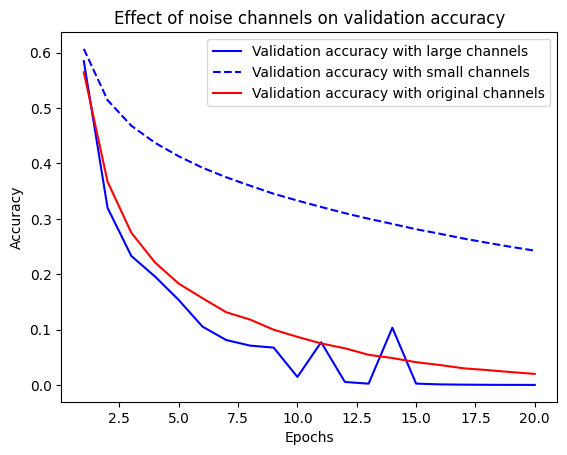

In [35]:
import matplotlib.pyplot as plt
val_acc_large = history_larger_model.history["loss"]
val_acc_small = history_smaller_model.history["loss"]
val_acc_original = history_original.history["loss"]
epochs = range(1,21)
plt.plot(epochs, val_acc_large, "b-",
         label="Validation accuracy with large channels")
plt.plot(epochs, val_acc_small, "b--",
         label="Validation accuracy with small channels")
plt.plot(epochs, val_acc_original, "r-",
         label="Validation accuracy with original channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [36]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.6143 - accuracy: 0.7760 - val_loss: 0.4924 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4197 - accuracy: 0.8897 - val_loss: 0.4029 - val_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3459 - accuracy: 0.9100 - val_loss: 0.3678 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3088 - accuracy: 0.9202 - val_loss: 0.3576 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2845 - accuracy: 0.9285 - val_loss: 0.3552 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2688 - accuracy: 0.9341 - val_loss: 0.3878 - val_accuracy: 0.8706
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2544 - accuracy: 0.9415 - val_loss: 0.3577 - val_accuracy: 0.8877
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [37]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [38]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 66ms/step - loss: 0.6305 - accuracy: 0.6303 - val_loss: 0.5032 - val_accuracy: 0.8253
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5049 - accuracy: 0.7609 - val_loss: 0.3905 - val_accuracy: 0.8717
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4163 - accuracy: 0.8201 - val_loss: 0.3236 - val_accuracy: 0.8828
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3537 - accuracy: 0.8626 - val_loss: 0.3136 - val_accuracy: 0.8736
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3025 - accuracy: 0.8899 - val_loss: 0.2792 - val_accuracy: 0.8867
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2685 - accuracy: 0.9067 - val_loss: 0.2737 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2365 - accuracy: 0.9205 - val_loss: 0.2814 - val_accuracy: 0.8852
Epoch 8/20
30

## 요약